# Contens

1. Project Description
2. Data Description
3. Project Instruction :
   - 3.1 Open the dataset, decribe the procedure:
     - 3.1.1 checking dataset information
     - 3.1.2 data preparation
         - 3.1.2.1 df0
         - 3.1.2.2 df1
         - 3.1.2.3 df2
   - 3.2 Fitting and test the model for each regions
   - 3.3 Preparation for profit calculation
   - 3.4 Define function to calculate profit of the selected oil well and the prediction mode
     - 3.4.1 choose oil wells with highest prediction value
     - 3.4.2 define function to calculate profit
   - 3.5 Calculate the risk and profit for each regions
     - use the bootstrapping technique with 1000 samples to find the profit distribution
4. Conclusion

## Project Description

OilyGiant is oil and gas company.

Goals :
- Find the best location to drill new well, with :
  - collect the crude oil quality and volume of crude oil reserve
  - define model to predict the volume of oil reserve in a new well
  - choose the oil well with highest estimated value
  - choose the region with the highest total profit for selected oil wells. 
- find out the profit analysis and risk using bootstrapping techniques.

## Data Description

Geological exploration data for three regions :
- geo_data_0.csv
- geo_data_1.csv
- geo_data_2.csv
- id — Unique ID of the oil well
- f0, f1, f2 — three point features (the specific meaning is not important, but the features themselves are significant)
- product — volume of oil reserves in wells (thousands of barrels).

Conditions :
- only linear regression is appropriate to fitting the models
- When exploring the territory, a study of 500 locations was carried out by selecting the best 200 locations for profit calculation.
- The budget for developing 200 oil wells is 100 million USD.
- 1 barrel crude oil = 4,5 USD. Revenue from one unit of product is 4, 500 dollars (the volume of oil reserves in thousands of barrels)
- After evaluating the risks, maintain only regions with a risk of loss lower than 2.5%. From the list of regions that meet the criteria, select the region with the highest average profit.

## Project Instruction

### Open the dataset, describe the procedure
#### Checking dataset information


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from tqdm import tqdm

In [2]:
#load the dataset
df0 = pd.read_csv('/datasets/geo_data_0.csv')
df1 = pd.read_csv('/datasets/geo_data_1.csv')
df2 = pd.read_csv('/datasets/geo_data_2.csv')


#### Data preparation
##### df0

In [3]:
#check dataset 
df0.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [4]:
#dataset shape
df0.shape

(100000, 5)

In [5]:
df0

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647
...,...,...,...,...,...
99995,DLsed,0.971957,0.370953,6.075346,110.744026
99996,QKivN,1.392429,-0.382606,1.273912,122.346843
99997,3rnvd,1.029585,0.018787,-1.348308,64.375443
99998,7kl59,0.998163,-0.528582,1.583869,74.040764


In [6]:
#check null value
df0.isnull().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [7]:
#check duplicated dataset
df0.duplicated().sum()

0

In [8]:
#check dataset info
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [9]:
#decribe dataset
df0.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


Text(0.5, 1.0, 'Geo data Region 0')

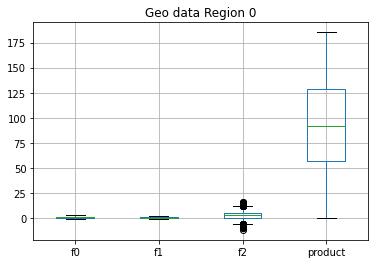

In [10]:
#cek boxplot
df0.boxplot()
plt.title('Geo data Region 0')

Findings:
- datasets df0
  - have no missing value
  - have no duplicated
  - have 100000 row and 5 columns
  - the mean of well reserves from region 0 : 91.849972 barrels
  
Insight :
- datasets are ready for further analyzed

##### df1

In [11]:
#check dataset 
df1.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [12]:
#dataset shape
df1.shape

(100000, 5)

In [13]:
#check null value
df1.isnull().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [14]:
#check duplicated dataset
df1.duplicated().sum()

0

In [15]:
#check dataset info
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [16]:
#decribe dataset
df1.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


Text(0.5, 1.0, 'Geo data Region 1')

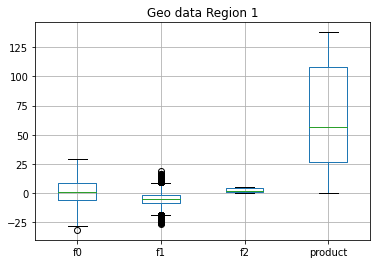

In [17]:
#cek boxplot
df1.boxplot()
plt.title('Geo data Region 1')

Findings:
- datasets df1
  - have no missing value
  - have no duplicated
  - have 100000 row and 5 columns
  - the mean of well reserves from region 1 : 57.085625 barrels
  
Insight :
- datasets are ready for further analyzed

##### df2

In [18]:
#check dataset 
df2.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [19]:
#dataset shape
df2.shape

(100000, 5)

In [20]:
#check null value
df2.isnull().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [21]:
#check duplicated dataset
df2.duplicated().sum()

0

In [22]:
#check dataset info
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [23]:
#decribe dataset
df2.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


Text(0.5, 1.0, 'Geo data Region 2')

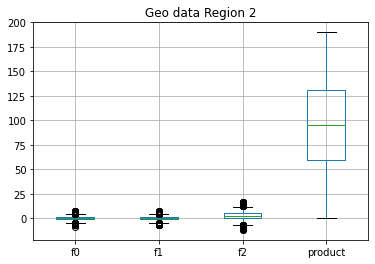

In [24]:
#cek boxplot
df2.boxplot()
plt.title('Geo data Region 2')

Findings:
- datasets df2
  - have no missing value
  - have no duplicated
  - have 100000 row and 5 columns
  - the mean of well reserves from region 2 : 94.925613 barrels
  
Insight :
- datasets are ready for further analyzed

Findings on data preparation:
- all datasets ( df0, df1, and df2 ) are :
  - have no missing value
  - have no duplicated
  - have the same size 100000 row and 5 columns

Insight :
- all datasets are ready to analyze


### Fitting and test the model for each regions


In [25]:
#combine dataset

df_all = pd.concat([df0,df1,df2], keys=[0,1,2]).drop('id',axis=1)


In [26]:
#df_all = df_all.drop('id',axis=1)

In [27]:
df_all


f0        f1        f2     product
0 0      0.705745 -0.497823  1.221170  105.280062
  1      1.334711 -0.340164  4.365080   73.037750
  2      1.022732  0.151990  1.419926   85.265647
  3     -0.032172  0.139033  2.978566  168.620776
  4      1.988431  0.155413  4.751769  154.036647
...           ...       ...       ...         ...
2 99995 -1.777037  1.125220  6.263374  172.327046
  99996 -1.261523 -0.894828  2.524545  138.748846
  99997 -1.199934 -2.957637  5.219411  157.080080
  99998 -2.419896  2.417221 -5.548444   51.795253
  99999 -2.551421 -2.025625  6.090891  102.775767

[300000 rows x 4 columns]

In [28]:
state = np.random.RandomState(12345)
#save the prediction and correct answer for validation set
samples_target = []
samples_prediction = []
for area in range (3):
    df = df_all.loc[area]
    features = df.drop('product', axis = 1)
    target = df['product']
    
    #separate the dataset to be training set and validation set with ration 75:25
    features_train, features_valid, target_train, target_valid = train_test_split (
        features, target, test_size = 0.25, random_state = state)
    
    #fitting the model and predict for validation set
    model = LinearRegression()
    model.fit (features_train, target_train)
    predictions = model.predict (features_valid)
    
    #save the prediction and correct answer for validation set
    samples_target.append (target_valid.reset_index(drop=True))
    samples_prediction.append(pd.Series(predictions))
    mean_product_target = target.mean ()
    mean_product_prediction = predictions.mean ()
    model_rmse = mean_squared_error (target_valid, predictions)**0.5
    
    #display the average volume of predicted oil reserve and the RMSE model
    print ('-- Region', area, '--')
    print ('Mean of well reserve target amount =', mean_product_target,' barrels')
    print ('Mean of well reserve prediction amount =', mean_product_prediction, ' barrels')
    print ('Model RMSE =', model_rmse)
    print ()

-- Region 0 --
Mean of well reserve target amount = 92.50000000000001  barrels
Mean of well reserve prediction amount = 92.59256778438035  barrels
Model RMSE = 37.5794217150813

-- Region 1 --
Mean of well reserve target amount = 68.82500000000002  barrels
Mean of well reserve prediction amount = 68.76995145799754  barrels
Model RMSE = 0.889736773768065

-- Region 2 --
Mean of well reserve target amount = 95.00000000000004  barrels
Mean of well reserve prediction amount = 95.087528122523  barrels
Model RMSE = 39.958042459521614



Findings : 
- Region 2 has highest mean value of well reserve target and prediction but also has highest RMSE value
- Region 1 has smallest mean value of well reserve also smallest RMSE value
- Region 0 mean value of well reserve and RMSE valuse are quite high 
  
insight :
- Region 1 has the best prediction accuracy but the predicted mean value of well reserve is the lowest

### preparation for profit calculation

In [29]:
#defined values of each variables
sample_size = 500
bootstrap_size = 1000

budget = 100000000
cost_per_point = 500000

product_price = 4500

points_per_budget = budget // cost_per_point

In [30]:
#minimun reserve to have profit
min_reserve = 500000 / 4500
print ('Minimun well reserve to have profit :', round(min_reserve), 'barels' )
print ()
#comparation with each region
for region in range (3):
    sample_predictions = samples_prediction[region]
    top_200_product = sample_predictions.sort_values(ascending=False)[:200]
        
    total_product = top_200_product.sum()
    total_cost = 200*cost_per_point
    total_income = product_price * total_product
    profit = total_income - total_cost
  
    print ('-- REGION', region,' Prediction --')
    print ('Mean of well reserve :', round(top_200_product.mean()), 'barels')
    print ('Profit region        :', round(profit),' USD')
        
    print ()
    

Minimun well reserve to have profit : 111 barels

-- REGION 0  Prediction --
Mean of well reserve : 156 barels
Profit region        : 39960489  USD

-- REGION 1  Prediction --
Mean of well reserve : 139 barels
Profit region        : 24873891  USD

-- REGION 2  Prediction --
Mean of well reserve : 149 barels
Profit region        : 34224063  USD



Findings :
- Minimun well reserve to have profit : 111 barels
- Mean of well reserve :
  - Region 0 = 156 barels
  - Region 1 = 139 barels
  - Region 2 = 149 barels

Insight :
- Region 0 has the highest well reserve prediction 

### define function to calculate profit of the selected oil well and the prediction mode

#### choose oil wells with highest prediction value

In [31]:
for region in range (3):
    top_200_predictions = samples_prediction[region].sort_values(ascending=False)[:200]
    total_reserve = top_200_predictions.sum()
    
    #oil wells with highest prediction value
    print ('Top 200 prediction wells in region', region)
    print ()
    print (top_200_predictions)
    print ()
    #Summary the target volume of oil reserves based on these predictions
    print ('Reserve volume of Top 200 prediction wells in region', region,'=',round(total_reserve), 'Barels' )
    print ('---------------------------------------------------------------------')
    print ()

Top 200 prediction wells in region 0

9317     180.180713
219      176.252213
10015    175.850623
11584    175.658429
23388    173.299686
            ...    
7888     148.507064
7890     148.481767
24051    148.476498
24160    148.436761
20340    148.365941
Length: 200, dtype: float64

Reserve volume of Top 200 prediction wells in region 0 = 31102 Barels
---------------------------------------------------------------------

Top 200 prediction wells in region 1

10423    139.984575
12384    139.816303
16993    139.676116
7023     139.587876
6120     139.528108
            ...    
4471     138.432663
12787    138.429606
4826     138.427649
11584    138.425832
300      138.423680
Length: 200, dtype: float64

Reserve volume of Top 200 prediction wells in region 1 = 27750 Barels
---------------------------------------------------------------------

Top 200 prediction wells in region 2

12030    173.791575
2349     166.060020
21588    165.952515
855      163.902074
24763    163.848998
      

#### define function to calculate profit 

In [32]:
def prediction_profit (prediction, name, income = 4500, total_cost=100000000, points=200):
    prediction = prediction[name]
    predict_top200 = prediction.sort_values(ascending=False)[:points]
    product = predict_top200.sum()
    total_cost = round(total_cost / 1000000 )
    total_income = round (income*product / 1000000)
    profit = round (total_income - total_cost)
    
    print ('========================')
    print (f'Profitability Region {name}')
    print (f'Total Income : {total_income}')
    print (f'Total Cost   : {total_cost}')
    print (f'Profit       : {profit}','M USD')

In [33]:
def target_profit (target, predictions):
    prediction_sorted = predictions.sort_values(ascending=False)
    selected_points = target[prediction_sorted.index][:points_per_budget]
    product = selected_points.sum()
    revenue = product * product_price
    cost = budget
    profit = revenue - cost
    return profit

In [34]:
prediction_profit(prediction=samples_prediction, name=0)
prediction_profit(prediction=samples_prediction, name=1)
prediction_profit(prediction=samples_prediction, name=2)

Profitability Region 0
Total Income : 140
Total Cost   : 100
Profit       : 40 M USD
Profitability Region 1
Total Income : 125
Total Cost   : 100
Profit       : 25 M USD
Profitability Region 2
Total Income : 134
Total Cost   : 100
Profit       : 34 M USD


In [35]:
for region in range (3):
    result = target_profit(samples_target[region], samples_prediction[region])/ 1000000
    
    print ('Target Profit region',region,': ', round(result),' M USD')
        
    print ()

Target Profit region 0 :  33  M USD

Target Profit region 1 :  24  M USD

Target Profit region 2 :  25  M USD



Findings :
- Region 0 has the highest 200 top rank wells with 31102 barrels

Recomendation :
- explore and drilling the new wells in region 0, due to region 0 :
  - has the top 200 prediction wells with highest reserve
  - has the highest prediction and target profit


### Calculate the risk and profit for each region

#### Use the bootstrapping technique with 1,000 samples to find the profit distribution

In [36]:
#define function to calculate profit of bootstrap prediction
def calculate_profit_bootstrap (prediction, name, income = 4500, total_cost=100000000, points=200):
    predict_top200 = prediction.sort_values(ascending=False)[:points]
    product = predict_top200.sum()
    total_cost = total_cost
    total_income = income*product
    profit = total_income - total_cost
    return profit

In [37]:
#define function to find target profit
def profit (target, predictions):
    prediction_sorted = predictions.sort_values(ascending=False)
    selected_points = target[prediction_sorted.index][:points_per_budget]
    product = selected_points.sum()
    revenue = product * product_price
    cost = budget
    profit = revenue - cost
    return profit

In [38]:
bootstrap_size

1000

In [39]:
for region in range(3):
    target = samples_target[region]
    predictions = samples_prediction [region]
    
    profit_values_prediction = []
    profit_values_target = []
    
    #Use the bootstrapping technique with 1,000 samples to find the profit distribution
    for i in tqdm(range (bootstrap_size)):
        target_sample = target.sample(sample_size, replace = True, random_state=state)
        predictions_sample = predictions[target_sample.index]
        
        profit_values_prediction.append(calculate_profit_bootstrap(prediction=predictions_sample, name=region))
        profit_values_target.append(profit(target_sample, predictions_sample))
    
    profit_values_prediction = pd.Series(profit_values_prediction)
    profit_values_target = pd.Series(profit_values_target)
    
    #Find the average profit
    mean_profit_prediction = profit_values_prediction.mean()
    mean_profit_target = profit_values_target.mean()
    
    #95% confidence interval
    confidence_interval_prediction = (profit_values_prediction.quantile(0.025), profit_values_prediction.quantile(0.975))
    confidence_interval_target = (profit_values_target.quantile(0.025), profit_values_target.quantile(0.975))
    
    #calculate risk of loss
    negative_profit_chance_prediction = (profit_values_prediction < 0). mean()
    negative_profit_chance_target = (profit_values_target < 0). mean()
    
    print ('-- Region',region,'--')
    print ()
    print ('prediction base calculation')
    print ('  Mean profit :', round(mean_profit_prediction), 'USD')
    print ('  95% Confidence interval :', confidence_interval_prediction)
    print ('  Risk of losses :',negative_profit_chance_prediction*100,'%')
    print ()
    print ('target base calculation')
    print ('  Mean profit :', round(mean_profit_target), 'USD')
    print ('  95% Confidence interval :', confidence_interval_target)
    print ('  Risk of losses :',negative_profit_chance_target*100,'%')
    print ('---------------------------------------------------')

100%|██████████| 1000/1000 [00:02<00:00, 442.55it/s]


-- Region 0 --

prediction base calculation
  Mean profit : 3547643 USD
  95% Confidence interval : (1291748.6006637588, 5899625.922454955)
  Risk of losses : 0.1 %

target base calculation
  Mean profit : 4238972 USD
  95% Confidence interval : (-761878.1389036368, 9578465.319517836)
  Risk of losses : 4.8 %
---------------------------------------------------


100%|██████████| 1000/1000 [00:02<00:00, 480.34it/s]


-- Region 1 --

prediction base calculation
  Mean profit : 4527355 USD
  95% Confidence interval : (592566.4060110353, 8572618.296502348)
  Risk of losses : 0.7000000000000001 %

target base calculation
  Mean profit : 5132567 USD
  95% Confidence interval : (1080668.9523396173, 9285744.392324952)
  Risk of losses : 0.6 %
---------------------------------------------------


100%|██████████| 1000/1000 [00:02<00:00, 494.55it/s]

-- Region 2 --

prediction base calculation
  Mean profit : 2852822 USD
  95% Confidence interval : (925963.4941324021, 4786743.6800649315)
  Risk of losses : 0.2 %

target base calculation
  Mean profit : 3811204 USD
  95% Confidence interval : (-1428006.300878686, 8933805.657503996)
  Risk of losses : 7.3999999999999995 %
---------------------------------------------------


Findings :
- Region 1 has the highest mean profit calculation both for :
  - prediction base calculation = 4560762 USD with 0.7 % Risk of losses
  - target base calculation with = 5163314 USD with 0.6 % Risk of losses

Recomendation :
- Explore and drilling the new wells in regions 1 to have highest profit calculation and low risk of losses


## Conclussion


- Echoing the RMSE calculation result, bootstraping technique with 1000 samples showing that Region 1 is the best region to develop new wells
- With bootstraping technique, both profit calculation using prediction base and target base calculation showing the highest profit value in the region 1 rather than other regions with the slightly low of Risk of Losses ( less than 1 % )
- Based on calculations and data analysis, it's recomended OilyGiant company to explore and drilling the new wells in the Region 1